---

# K Means Cluster

## Introduction

k-means clustering is a method of vector quantization, originally from signal processing, that aims to partition n observations into k clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. This results in a partitioning of the data space into Voronoi cells. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances, which would be the more difficult Weber problem: the mean optimizes squared errors, whereas only the geometric median minimizes Euclidean distances. For instance, better Euclidean solutions can be found using k-medians and k-medoids.

<p>
    <img src="KMC.png" width="500" align="center">
</p>

K-means clustering is the unsupervised machine learning algorithm that is part of a much deep pool of data techniques and operations in the realm of Data Science. It is the fastest and most efficient algorithm to categorize data points into groups even when very little information is available about data.

## Key Features

1. It is very smooth in terms of interpretation and resolution.

2. For a large number of variables present in the dataset, K-means operates quicker than Hierarchical clustering. 

3. While redetermining the cluster centre, an instance can modify the cluster. 

4. K-means reforms compact clusters.

5. It can work on unlabeled numerical data.

6. Moreover, it is fast, robust and uncomplicated to understand and yields the best outcomes when datasets are well distinctive (thoroughly separated) from each other.

## Algorithm

- K-centres are modelled randomly in accordance with the present value of K.

- K-means assigns each data point in the dataset to the adjacent centre and attempts to curtail Euclidean distance between data points. Data points are assumed to be present in the peculiar cluster as if it is nearby to centre to that cluster than any other cluster centre. 

- After that, k-means determines the centre by accounting the mean of all data points referred to that cluster centre. It reduces the complete variance of the intra-clusters with respect to the prior step. Here, the “means” defines the average of data points and identifies a new centre in the method of k-means clustering.

- The algorithm gets repeated among the steps 2 and 3 till some paradigm will be achieved such as the sum of distances in between data points and their respective centres are diminished, an appropriate number of iterations is attained, no variation in the value of cluster centre or no change in the cluster due to data points. 

## Stopping Criteria

- If the centroids of the newly built clusters are not changing.
- If data points remain in the same cluster.
- If the maximum number of iterations have achieved

---

## Implement

First, load and visualize the classification dataset.

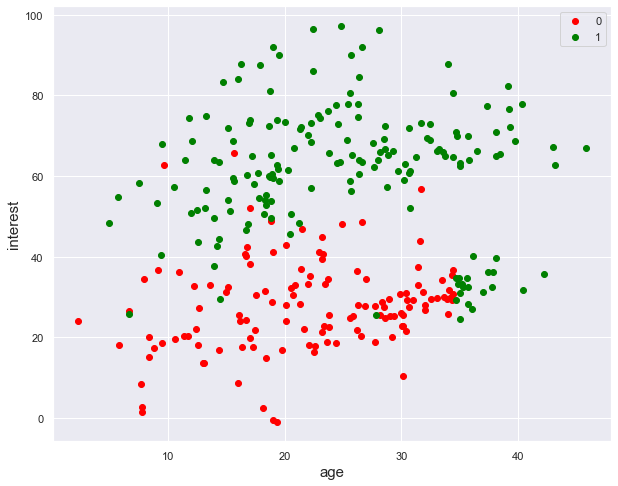

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

# Set theme 

sns.set_theme()
# Import the data
df = pd.read_csv("classification.csv")
results = [0.0, 1.0]
colors = ["red", "green"]
fig, ax = plt.subplots(figsize = (10, 8))
for results, colors in zip(results, colors):
    temp_df = df[df.success == results]
    ax.scatter(temp_df.age,
               temp_df.interest,
               c = colors,
               label = int(results), 
               )
    
ax.set_xlabel("age", fontsize = 15)
ax.set_ylabel("interest", fontsize = 15)
ax.legend()
plt.show()

In [2]:
X = df[["age", "interest"]].to_numpy()
y = df["success"].to_numpy()
y = y.astype(int)

def colors(y):
    if y == 0:
        return "red"
    elif y == 1:
        return "lightseagreen"

c = [colors(label) for label in y]

Next, we visualize the dataset without lable.

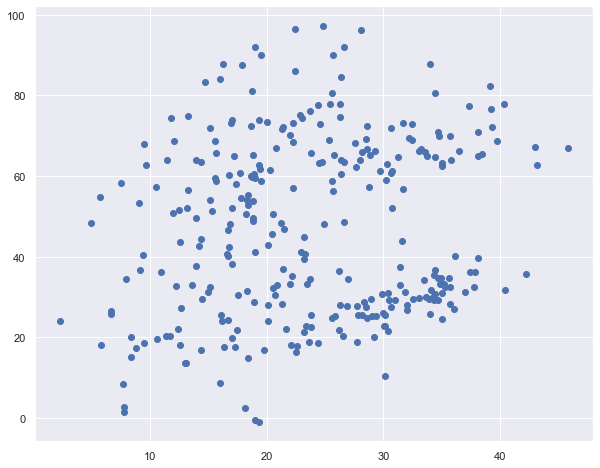

In [3]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.show()

Point a point of lable "0" and a point of lable "1" based on the raw scatters plot.

In [14]:
centers = []
for k in range(2):
    i = np.random.randint(0, 297)
    point = (X[i, 0], X[i, 1], k)
    centers.append(point)

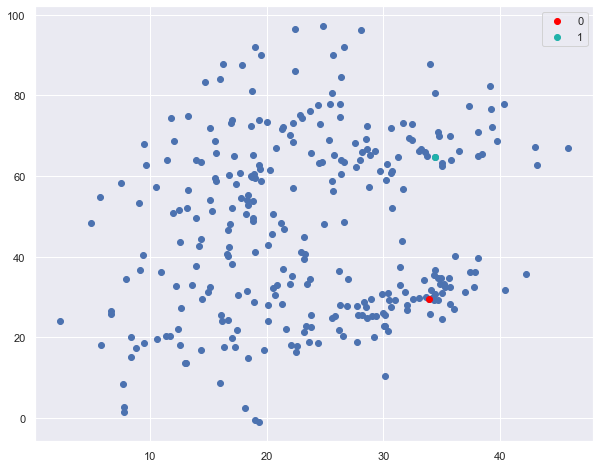

In [15]:
plt.figure(figsize = (10, 8))
plt.scatter(X[:, 0], X[:, 1])
plt.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
plt.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
plt.legend()
plt.show()

Define the distance function , assign_lable function and assign_clusters function.

In [18]:
def distance(i, X, center):
    return np.sqrt(sum((X[i, j] - center[j])**2 for j in range(2)))

def assign_label(i, X, centers):
    distances = np.array([distance(i, X, center) for center in centers])
    label = np.argmin(distances)
    return label 

def assign_clusters(X, centers):
    return [assign_label(i, X, centers) for i in range(len(X))]

Compare the output(on the right) of K Means Cluster model to the actual lable plot(on the lefr).

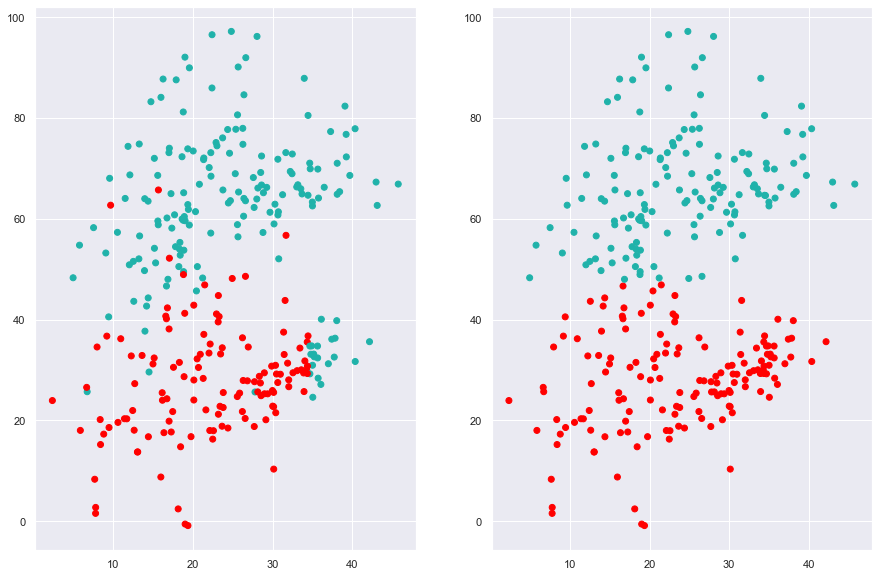

In [21]:
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)
ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
ax2.scatter([centers[0][0]], [centers[0][1]], color = "red", label = centers[0][2])
ax2.scatter([centers[1][0]], [centers[1][1]], color = "lightseagreen", label = centers[1][2])
plt.show()

It looks not bad! Let's see if we can update the model.

In [22]:
def update_centers(X, centers):
    current_labels = assign_clusters(X, centers)
    k = len(centers)
    center_means = {i : [0, 0] for i in range(k)}
    for i in range(len(X)):
        center_means[current_labels[i]][0] += X[i, 0]
        center_means[current_labels[i]][1] += X[i, 1]

    for i in range(k):
        num_occur = current_labels.count(i)
        center_means[i][0] = center_means[i][0]/num_occur
        center_means[i][1] = center_means[i][1]/num_occur
    
    return [(center_means[i][0], center_means[i][1]) for i in center_means]
        

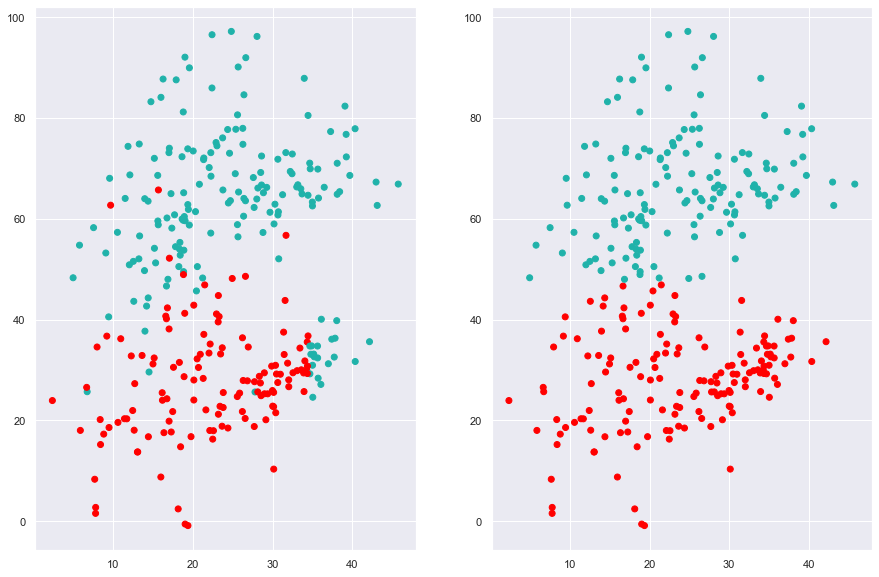

In [34]:
new_centers = update_centers(X, centers)
current_labels = assign_clusters(X, new_centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)

The output of the updated model is same as the former, there is no improvement. According to the stopping criteria, if the centroids of the newly built clusters are not changing, we stop.

Next, we will combine centers function adn update_centers function in one function and create the plot again.

In [27]:
def k_means_clustering(X, k, max_iter = 100):
    centers = []
    for j in range(k):
        i = np.random.randint(0, 100)
        point = (X[i, 0], X[i, 1], j)
        centers.append(point)
    
    for _ in range(max_iter):
        centers = update_centers(X, centers)

    return centers

In [29]:
centers = k_means_clustering(X, 2)
centers

[(23.95160903109329, 66.67432809904508),
 (23.475836986849426, 27.950639033526958)]

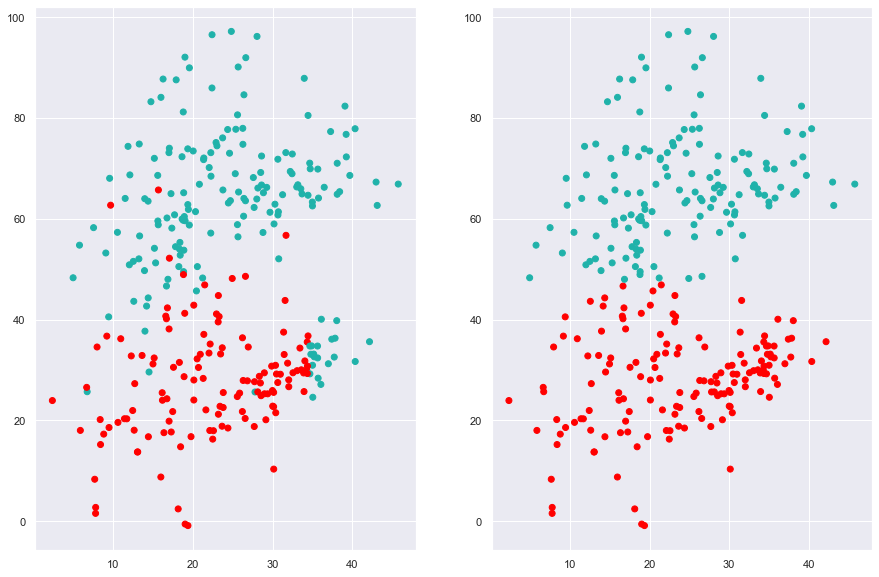

In [36]:
centers = k_means_clustering(X, 2)
current_labels = assign_clusters(X, centers)
current_colors = [colors(label) for label in current_labels]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 10))
ax1.scatter(X[:, 0], X[:, 1], c = c)

ax2.scatter(X[:, 0], X[:, 1], c = current_colors)
plt.show()

It's same as the former.